 Education and Housing
 ====

For my two datasets, I targeted education and housing, two cornerstones in the pursuit of meaningful life. When it comes to the best neighborhoods to live in within Pittsburgh, both education and housing play a huge role in choosing where to settle down/move for the sake of a family and creating a home. My metric for both of these was simply to rank them from greatest to least, with the best being 1 the worst being 91, convert those ranks directly to points, and using golf rules, the lowest total score would win. For example, the best possible score between these two datasets would be two (2), assuming that neighborhood ranked as the best in each dataset.

#### Importing Pandas, Numpy, Geopandas, and Matplotlib

In [4]:
import pandas as pd
import numpy as np
import geopandas 
%matplotlib inline
import matplotlib.pyplot as plt

## Education

Education is one of the cornerstones of growing up and living a full life. As Jean Piaget said, "The principal goal of education is to create men and women who are capable of doing new things, not simply of repeating what other generations have done." With that in mind, it was critical to include education as a metric by which we ranked the best neighborhoods in Pittsburgh.

#### Organizing the Data

In [5]:
schools = pd.read_csv("school.csv") #reading the dataset

In [29]:
schoolranks = pd.DataFrame(columns = ['Neighborhood', 'Percent_Enrolled'])
for i in schools.index:
    schoolranks.at[i, "Neighborhood"] = schools["Neighborhood"][i]
    schoolranks.at[i, "Percent_Enrolled"] = 0
i = 0
#establishing a new column in the data for percentages of students enrolled in the population
for index, row in schools.iterrows():
    schoolranks.at[i, "Neighborhood"] = row["Neighborhood"]
    schoolranks.at[i, "Percent_Enrolled"] = (schools["Estimate; Enrolled in school:"][i])/(schools["Estimate; Total:"][i])
    i += 1
#fill that column with the percentages for each neighborhood
schoolranks = schoolranks.sort_values(by=["Percent_Enrolled"], ascending = False).reset_index(drop=True) 
#reindexing the neighborhoods in order to rank them based on percent enrolled and not alphabetically/total population

In [30]:
edurank = pd.DataFrame(columns=['Neighborhood', 'Rank']) 
for i in schoolranks.index:
    edurank.at[i, "Neighborhood"] = schoolranks["Neighborhood"][i]
    edurank.at[i, "Rank"] = 0
i = 0
#making a new dataframe to establish all the neighborhoods as ranks and to easily compare csvs later
for index, row in schoolranks.iterrows():
    edurank.at[i, "Neighborhood"] = row["Neighborhood"]
    edurank.at[i, "Rank"] = i+1
    i += 1
    
edurank.to_csv("education_rankings.csv", index = False) #turn it to a csv
eduranks = pd.read_csv("education_rankings.csv")

#### Geopandas Graphing

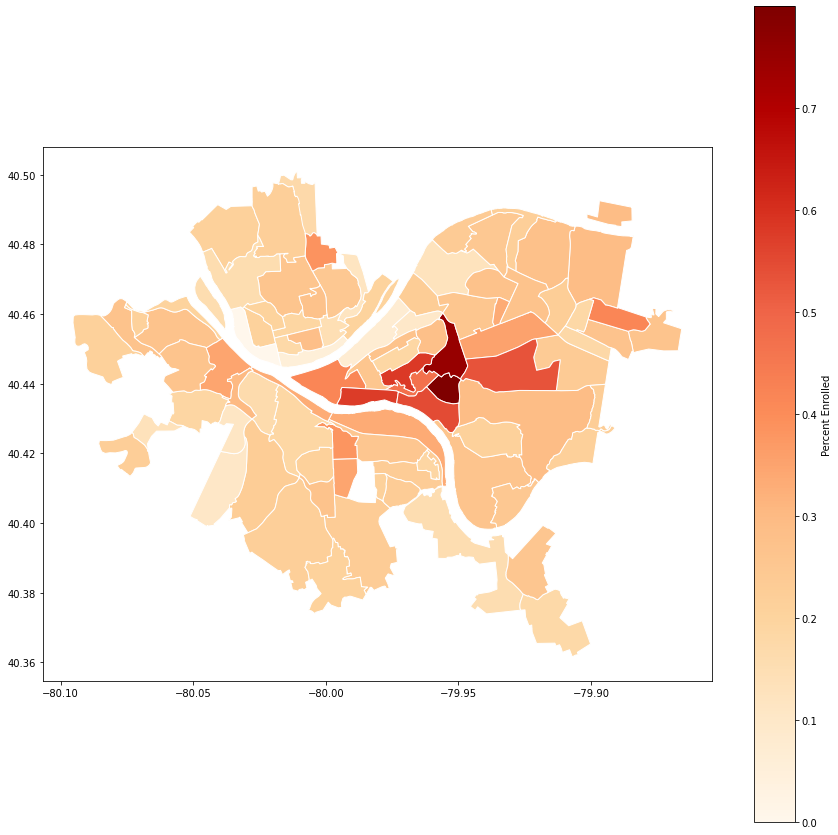

In [31]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
percent = schoolranks.groupby("Neighborhood").sum()["Percent_Enrolled"]
percent.sort_values(ascending = False)
percmap = neighborhoods.merge(percent, how='left', left_on='hood', right_on='Neighborhood')
percmap.plot(column = "Percent_Enrolled",
            cmap = 'OrRd',
            edgecolor = 'white',
            legend = True,
            legend_kwds = {"label": "Percent Enrolled"},
            figsize = (15,15))

#### Education Conclusion


As portrayed in this map of Pittsburgh's neighborhoods, there are five neighborhoods that clearly stand out among the 91 pictured. Those five in order are, Central Oakland, North Oakland, Terrace Village, Bluff, and South Oakland. With these five having the greatest enrollment percentages, it can be concluded that these are the five best neighborhoods for education, and therefore deserving of their rank. Based purely on this metric, the top neighborhood is Central Oakland, but another notable neighborhoods are Squirrel Hill North at sixth, a neighborhood that ranks well in most metrics.

Housing Metric
-------

When starting your life, as a college student, as an adult, or as a family, housing is the number one priority. In fact, without a home, you cannot live essentially. It was vital to our search for the best neighborhood to include housing as a metric, and we decided that pure numbers would be our ranking system. Based on the total number of units available in each neighborhood, we determined what the best neighborhood to live in would be, since there needs to be homes in order to live in and establish life within a neighborhood.

#### Organizing the Data

In [22]:
housing = pd.read_csv("housing.csv")

In [68]:
housing = housing.sort_values(by=['Estimate; Total:'], ascending = False).reset_index(drop=True)
houserank = pd.DataFrame(columns=['Neighborhood', 'Rank'])
for i in housing.index:
    houserank.at[i, "Neighborhood"] = housing["Neighborhood"][i]
    houserank.at[i, "Rank"] = 0
i = 0
for index, row in housing.iterrows():
    houserank.at[i, "Neighborhood"] = row["Neighborhood"]
    houserank.at[i, "Rank"] = i+1
    i += 1
houserank.to_csv("housing_rankings.csv", index = False)
houseranks = pd.read_csv("housing_rankings.csv")

#### Geopandas

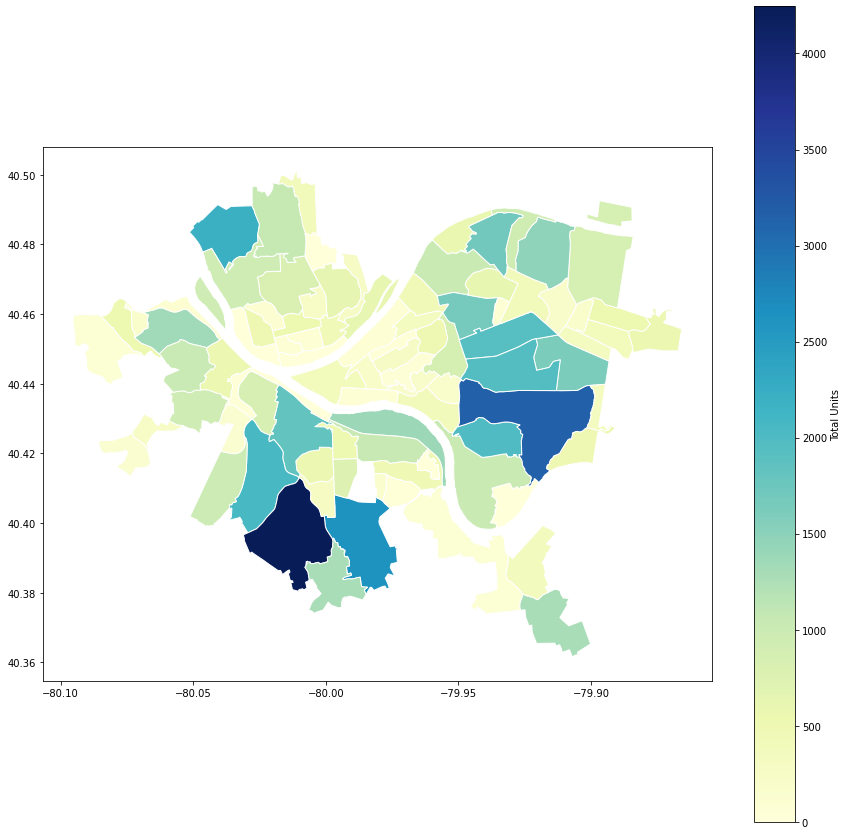

In [58]:
units = housing.groupby("Neighborhood").sum()["Estimate; Total:"]
units.sort_values(ascending = False)
unitmap = neighborhoods.merge(units, how = 'left', left_on='hood', right_on = "Neighborhood")

unitmap.plot(column = "Estimate; Total:",
            cmap = 'YlGnBu',
            legend = True,
            legend_kwds = {"label": "Total Units"},
            edgecolor = 'white',
            figsize = (15,15))

#### Housing Conclusion

As represented above, the five most prominent neighborhoods when it comes to the sheer number of housing units in a neighborhood are the following: Brookline, Squirrel Hill South, Carrick, Brighton Heights, and Beechview. Following the metric, the best neighborhood with respect to housing units is Brookline, yet as I mentioned earlier, Squirrel Hill North is a neighborhood to pay attention to, since they find themselves at seventh on this ranking. 

Housing and Education Conclusions
============

My overall conclusion is based on the same metrics we use throughout the entire project. Just like golf, the neighborhood with the lowest amount of points (when the rankings are added together) wins. The combined winner for these two metrics is undoubtedly Squirrel Hill North. Being the only neighborhood with two top ten rankings over both metrics, it is clear that this neighborhood is one of, if not, the best in all of Pittsburgh. The top three over this metric were Squirrel Hill North (13 points), Shadyside (20), and Squirrel Hill South (21).